# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [39]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [27]:
# sexo (1 = male; 0 = female)

tab_sex = (pd.crosstab(index=df['sex'], 
                       columns=df['flag_doente'], 
                       margins=True, 
                       margins_name='Total')
             .rename(index={0:'F', 1:'M'}, columns={0:'Saudável', 1:'Doente'}))

tab_sex

flag_doente,Saudável,Doente,Total
sex,,,
F,72,25,97
M,92,114,206
Total,164,139,303


In [28]:
# Quantidade média de doentes

tab_sex['Qtd_media_doentes'] = tab_sex['Doente']/tab_sex['Total']

tab_sex

flag_doente,Saudável,Doente,Total,Qtd_media_doentes
sex,,,,
F,72,25,97,0.257732
M,92,114,206,0.553398
Total,164,139,303,0.458746


In [29]:
#Odds

tab_sex['Odds'] = tab_sex['Saudável']/tab_sex['Doente']

tab_sex

flag_doente,Saudável,Doente,Total,Qtd_media_doentes,Odds
sex,,,,,
F,72,25,97,0.257732,2.880000
M,92,114,206,0.553398,0.807018
Total,164,139,303,0.458746,1.179856


In [30]:
# Odds ratio (Use o total como referência)

tab_sex['RC_vs_total'] = tab_sex['Odds']/tab_sex.loc['Total','Odds']

tab_sex

flag_doente,Saudável,Doente,Total,Qtd_media_doentes,Odds,RC_vs_total
sex,,,,,,
F,72,25,97,0.257732,2.880000,2.440976
M,92,114,206,0.553398,0.807018,0.683997
Total,164,139,303,0.458746,1.179856,1.000000


In [31]:
#Logito (LOG(Odds))

tab_sex['logito'] = np.log(tab_sex['Odds'])

tab_sex

flag_doente,Saudável,Doente,Total,Qtd_media_doentes,Odds,RC_vs_total,logito
sex,,,,,,,
F,72,25,97,0.257732,2.880000,2.440976,1.057790
M,92,114,206,0.553398,0.807018,0.683997,-0.214410
Total,164,139,303,0.458746,1.179856,1.000000,0.165392


In [34]:
# WOE

tab_sex['WOE'] = np.log(tab_sex['Odds'] / tab_sex.loc['Total', 'Odds'])

tab_sex

flag_doente,Saudável,Doente,Total,Qtd_media_doentes,Odds,RC_vs_total,logito,WOE
sex,,,,,,,,
F,72,25,97,0.257732,2.880000,2.440976,1.057790,0.892398
M,92,114,206,0.553398,0.807018,0.683997,-0.214410,-0.379802
Total,164,139,303,0.458746,1.179856,1.000000,0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [47]:
tab_age = (pd.crosstab(index=df['age'], 
                       columns=df['flag_doente'], 
                       margins=True, 
                       margins_name='total')
             .rename(columns={0:'healthy', 
                              1:'sick'})
             .groupby(by=pd.qcut(x=df['age'], q=5))
             .agg(func='sum'))


tab_age

flag_doente,healthy,sick,total
age,,,
"(28.999, 45.0]",41,22,63
"(45.0, 53.0]",26,40,66
"(53.0, 58.0]",35,43,78
"(58.0, 62.0]",37,22,59
"(62.0, 77.0]",25,12,37


In [55]:
tab_age['mean_healthy'] = tab_age['healthy'] / tab_age['total']
tab_age['mean_sick'] = tab_age['sick'] / tab_age['total']

tab_age['odds'] = tab_age['sick'] / tab_age['healthy']
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['total', 'odds']

tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds'] / tab_age.loc['total', 'odds'])

tab_age

flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE
age,,,,,,,,,
"(28.999, 45.0]",41,22,63,0.650794,0.349206,0.536585,0.633094,-0.622530,-0.457137
"(45.0, 53.0]",26,40,66,0.393939,0.606061,1.538462,1.815163,0.430783,0.596175
"(53.0, 58.0]",35,43,78,0.448718,0.551282,1.228571,1.449538,0.205852,0.371245
"(58.0, 62.0]",37,22,59,0.627119,0.372881,0.594595,0.701536,-0.519875,-0.354483
"(62.0, 77.0]",25,12,37,0.675676,0.324324,0.480000,0.566331,-0.733969,-0.568577
total,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

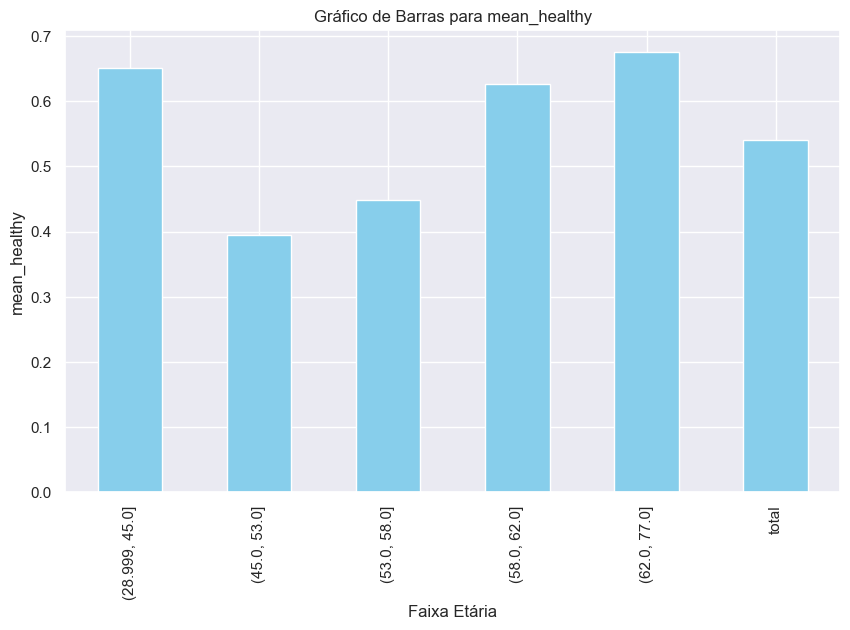

In [58]:
# Mean_healthy
column_to_plot = 'mean_healthy'

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
tab_age[column_to_plot].plot(kind='bar', color='skyblue')
plt.title(f'Gráfico de Barras para {column_to_plot}')
plt.xlabel('Faixa Etária')
plt.ylabel(column_to_plot)
plt.show()

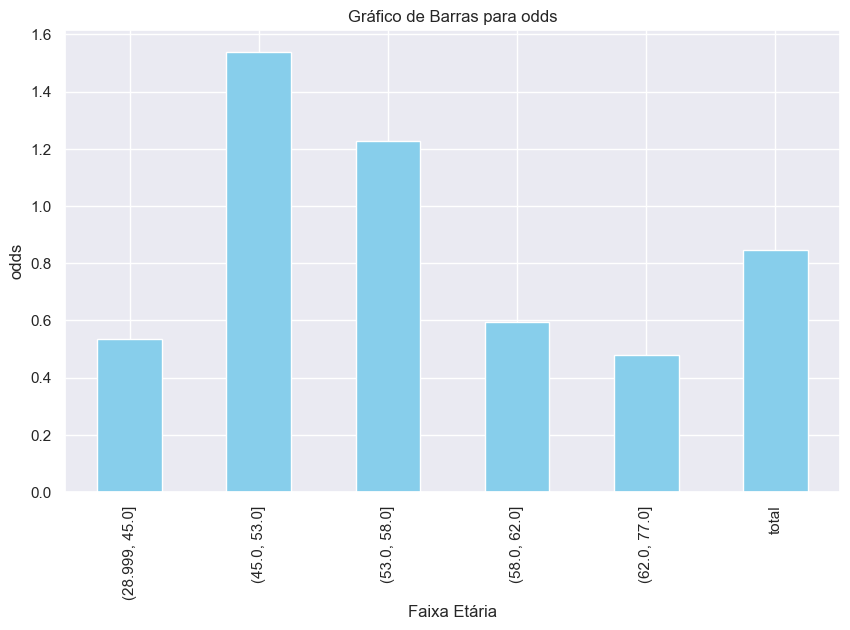

In [59]:
# Odds
column_to_plot = 'odds'

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
tab_age[column_to_plot].plot(kind='bar', color='skyblue')
plt.title(f'Gráfico de Barras para {column_to_plot}')
plt.xlabel('Faixa Etária')
plt.ylabel(column_to_plot)
plt.show()

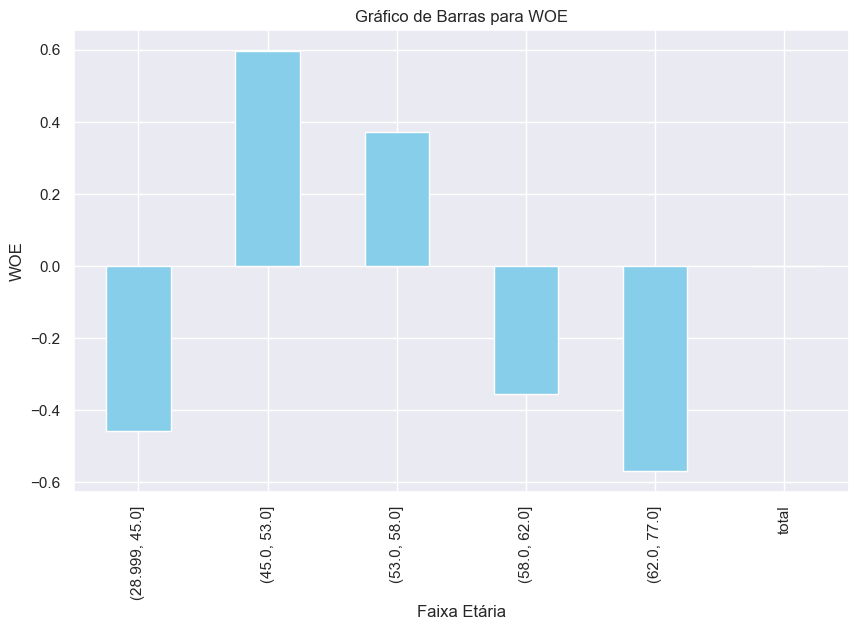

In [60]:
# WOE
column_to_plot = 'WOE'

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
tab_age[column_to_plot].plot(kind='bar', color='skyblue')
plt.title(f'Gráfico de Barras para {column_to_plot}')
plt.xlabel('Faixa Etária')
plt.ylabel(column_to_plot)
plt.show()